In [1]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml

In [2]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [3]:
a.add(112003)
a.add(111407)
a.repeat('1,2', 2)

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 100              | passive   |
|   2 |     111407 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 100              | passive   |
|   2 |     111407 | 100              | passive   |
|   3 |     112003 | 100              | passive   |
|   4 |     111407 | 100              | passive   |
|   5 |     112003 | 100              | passive   |
|   6 |     111407 | 100              | passive   |


In [4]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta)
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [5]:
def test(stack, film_range):
    for i in range(film_range[0],film_range[1]):
        print stack.config[i], film_range

In [6]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((2,1000))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [7]:
minTR(a,[1,len(a.config)-1],0.6,0.001)

[1, 6]
[1, 2, 3, 4, 5, 6]


  status: 9
 success: False
    njev: 101
    nfev: 839
     fun: 0.001484104425090017
       x: array([  81.67756621,  101.5530167 ,   81.83881971,  101.40684855,
         81.92749229,  101.35446587])
 message: 'Iteration limit exceeded'
     jac: array([  2.14204192e-08,  -4.22151061e-08,   1.68802217e-09,
         3.96539690e-08,  -2.52475729e-08,  -9.76433512e-09,
         0.00000000e+00])
     nit: 101

In [8]:
a.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     112003 | 81.6775662124    | passive   |
|   2 |     111407 | 101.5530167      | passive   |
|   3 |     112003 | 81.8388197115    | passive   |
|   4 |     111407 | 101.406848554    | passive   |
|   5 |     112003 | 81.9274922917    | passive   |
|   6 |     111407 | 101.354465886    | passive   |


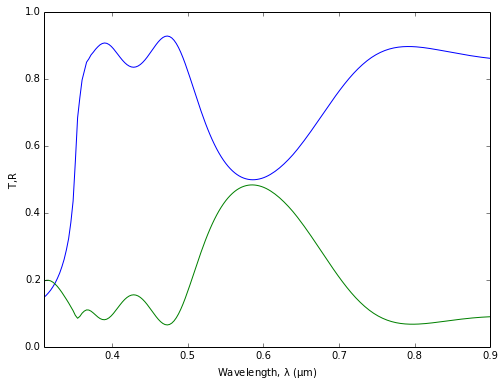

In [9]:
a.plot()

|     ID | SHELF   | BOOK   | PAGE       | DESCRIPTION                    |
|--------+---------+--------+------------+--------------------------------|
| 110101 | main    | Al2O3  | Malitson-o | Malitson and Dodge 1972: Synth |
| 110102 | main    | Al2O3  | Malitson-e | Malitson and Dodge 1972: Synth |
| 110103 | main    | Al2O3  | Hagemann   | Hagemann et al. 1974: n,k 0.00 |
| 110104 | main    | Al2O3  | Malitson   | Malitson 1962: Synthetic sapph |
| 110105 | main    | Al2O3  | Kischkat   | Kischkat et al. 2012: Thin fil |


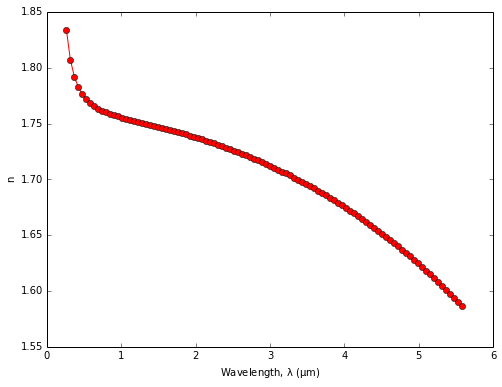

In [10]:
a.library.search('Al2O3')
a.library.plot(110104)

In [11]:
#start a new stack


b = traml.Stack()
b.add(111407)
b.add(112003)

b.repeat('1,2',1)




#add layers


|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
|   2 |     112003 | 100              | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
|   2 |     112003 | 100              | passive   |
|   3 |     111407 | 100              | passive   |
|   4 |     112003 | 100              | passive   |


|     ID | SHELF   | BOOK   | PAGE    | DESCRIPTION                 |
|--------+---------+--------+---------+-----------------------------|
| 105401 | main    | MgF2   | Li-o    | Li 1980: n(o) 0.14-7.5 µm   |
| 105402 | main    | MgF2   | Li-e    | Li 1980: n(e) 0.14-7.5 µm   |
| 105403 | main    | MgF2   | Dodge-o | Dodge 1984: n(o) 0.2-7.0 µm |
| 105404 | main    | MgF2   | Dodge-e | Dodge 1984: n(e) 0.2-7.0 µm |


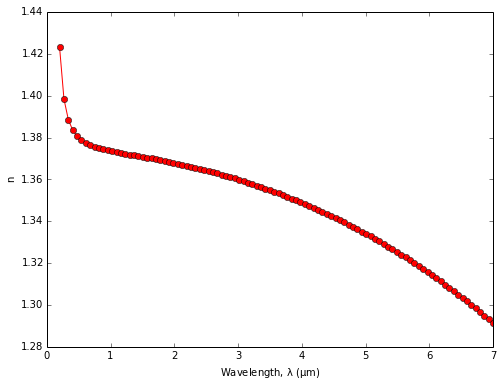

In [12]:
b.library.search('MgF2')
b.library.plot(105403)

In [13]:

minTR(b, [1,len(b.config)-1], 0.4, 0.002, TR='R')
    


[1, 4]
[1, 2, 3, 4]


  status: 0
 success: True
    njev: 83
    nfev: 561
     fun: 0.0026286868595277939
       x: array([ 133.87247089,   49.35899551,   67.01055652,  148.19104096])
 message: 'Optimization terminated successfully.'
     jac: array([  1.77533366e-09,   1.77533366e-09,   1.07684173e-09,
         3.20142135e-09,   0.00000000e+00])
     nit: 83

In [14]:
c = traml.Stack()

peak = 0.555
delta = 0.005
mat2 = 105401 #MgF2
mat1 = 111407 #SiO2
#mat2 = 114701 #ZnS
#mat2 = 112003 #ZnO
#mat2 = 110902 #MgO
#mat1 = 110104 #Al2O3

R = []
n = []
it = []


for i in range(0, 40):
    if i % 2 == 0:
        print 'even', i
        c.add(mat1,100)
    else:
        c.add(mat2,100)
        
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='R')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
   
    #c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    print '============================================================================================'

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
even 0
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 100              | passive   |
[1, 1]
[1]
0.082871480496
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 187.039390295    | passive   |
|   2 |     105401 | 100              | passive   |
[1, 2]
[1, 2]
0.112238593803
even 2
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 93.519517513     | passive   |
|   2 |     105401 | 100.335036282    | passive   |
|   3 |     111407 | 100              | passive

In [15]:
import matplotlib.pyplot as plt
c.set_range([0.25, 1])

In [16]:
R

[0.082871480495969069,
 0.1122385938025994,
 0.11223216475800525,
 0.1481979554813182,
 0.14818642864617407,
 0.18958007800051746,
 0.18956325168478036,
 0.23513033147861245,
 0.23510829348442963,
 0.28357418788136679,
 0.28355384908803249,
 0.33364366270660795,
 0.33367267296598901,
 0.38418175057485721,
 0.3843385527656179,
 0.43434283319216305,
 0.43435599761764776,
 0.48255158318195973,
 0.48061139248409912,
 0.52929719212562443,
 0.52007462741395249,
 0.57525856881801229,
 0.57123586592894648,
 0.6130162444854601,
 0.60073045175087714,
 0.65751811254021475,
 0.65007514853671089,
 0.68901626750929368,
 0.67802397228284694,
 0.72700073759915695,
 0.71388069045328162,
 0.75714923107673537,
 0.74512759241659321,
 0.78481759134627271,
 0.77354853925095601,
 0.80960454375561497,
 0.79963059867997655,
 0.83176359300317815,
 0.82270640612713741,
 0.85112697779465507]

In [ ]:
%matplotlib inline
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


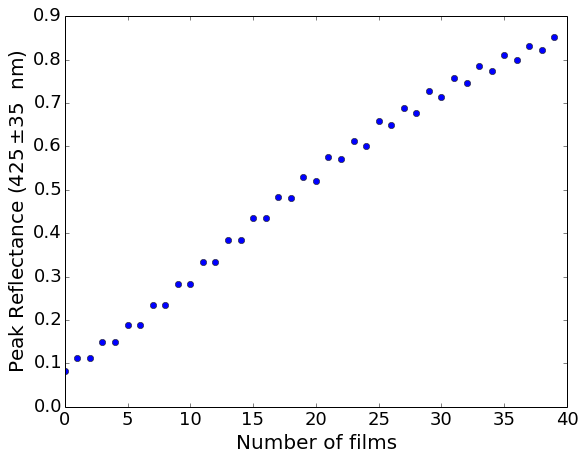

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.plot(R, 'o')
ax.set_xlim([0,40])
ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel(r'Peak Reflectance ($425\pm35$  nm)', fontsize=20)


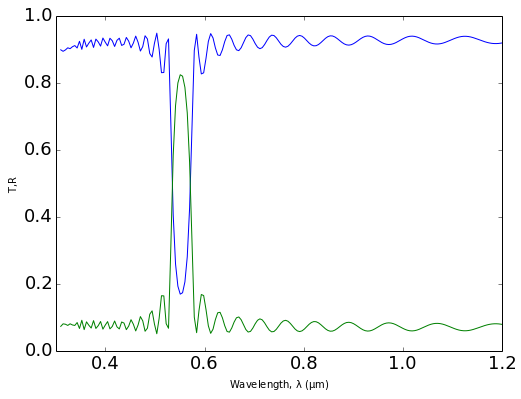

In [24]:
c.set_range([0.3,1.2])
c.plot()

In [25]:
c.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 93.5378973682    | passive   |
|   2 |     105401 | 100.356178938    | passive   |
|   3 |     111407 | 93.5402241522    | passive   |
|   4 |     105401 | 100.355443681    | passive   |
|   5 |     111407 | 93.5336875127    | passive   |
|   6 |     105401 | 100.344442184    | passive   |
|   7 |     111407 | 93.513610655     | passive   |
|   8 |     105401 | 100.318102111    | passive   |
|   9 |     111407 | 93.4805189066    | passive   |
|  10 |     105401 | 100.287518475    | passive   |
|  11 |     111407 | 93.4456976637    | passive   |
|  12 |     105401 | 100.25582458     | passive   |
|  13 |     111407 | 93.4188949204    | passive   |
|  14 |     105401 | 100.23046397     | passive   |
|  15 |     111407 | 93.3800980432    | passive   |
|  16 |     105401 | 100.197271836    | passive   |
|  17 |     

In [21]:
c.remove()

In [22]:
d.plot()

NameError: name 'd' is not defined

In [ ]:
print d.average('R',0.5, 0.02)